In [12]:
import warnings
warnings.filterwarnings(action='ignore')
%config Computer.use_jedi = False
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import missingno as msno
plt.rc('font', family='D2Coding')
from plotnine import *
import folium
from folium.plugins import MiniMap
from geopy.geocoders import Nominatim
import requests

In [13]:
middle_study = pd.read_csv('./data/중학교 방과후.csv')
middle_study

학교명 설립구분  교과프로그램수  교과수강학생수  특기적성프로그램수  특기적성수강학생수  프로그램수(계)  \
0             개원중학교   공립        4       29          5         75         9   
1             경원중학교   공립        0        0          9        159         9   
2             구룡중학교   공립        3       33          2         51         5   
3            압구정중학교   공립        0        0          6         77         6   
4    단국대학교사범대학부속중학교   사립        0        0          5         81         5   
..              ...  ...      ...      ...        ...        ...       ...   
382           항동중학교   공립        4       39          8        130        12   
383           신길중학교   공립        1       18          6         76         7   
384         마곡하늬중학교   공립        3       43          7         90        10   
385          해누리중학교   공립        2       28          7        304         9   
386           강빛중학교   공립        7       41          3         27        10   

     수강학생수(계)  방과후학교참여학생수  방과후학교 수익자부담금액  방과후학교 수익자부담외지원금액  
0         104         104        5553450            333900  
1         159         157        6135500           3885000  
2          84          84       15336310           1352620  
3          77          77              0          12000000  
4          81          81        2964340           5287330  
..        ...         ...            ...               ...  
382       169         121        1946000          13296000  
383        94          84        1440000             60000  
384       133         105       13280000          25227000  
385       332         332        3350000           2275000  
386        68          68              0          25800000  

[387 rows x 11 columns]

In [14]:
high_study = pd.read_csv('./data/고등학교 방과후.csv')
high_study

학교명 설립구분  교과프로그램수  교과수강학생수  특기적성프로그램수  특기적성수강학생수  프로그램수(계)  \
0             가락고등학교   공립        0        0          0          0         0   
1             강동고등학교   사립        4       97          0          0         4   
2             강서고등학교   사립        4       33          2         17         6   
3             개포고등학교   공립        0        0          0          0         0   
4    건국대학교사범대학부속고등학교   사립       57      137          0          0        57   
..               ...  ...      ...      ...        ...        ...       ...   
313          가재울고등학교   공립        0        0          1         15         1   
314           하나고등학교   사립        0        0          0          0         0   
315           금호고등학교   공립        0        0          0          0         0   
316           도선고등학교   공립        2       20          0          0         2   
317      덕수고등학교(일반고)   공립        5       61          0          0         5   

     수강학생수(계)  방과후학교참여학생수  방과후학교 수익자부담금액  방과후학교 수익자부담외지원금액  
0           0           0        1665500           1034500  
1          97          97       67573970           8687140  
2          50          50       24932000           2253900  
3           0           0              0                 0  
4         137         129       18773600            857300  
..        ...         ...            ...               ...  
313        15          15        2637760           1487170  
314         0           0      249465410          32426670  
315         0           0        2340000           3960000  
316        20          20        6547010          17027820  
317        61          61        3549000             56000  

[318 rows x 11 columns]

In [24]:
high_student = pd.read_csv('./data/고등학교 학생수.csv')
high_student

학교명  1학년(남)  1학년(여)  2학년(남)  2학년(여)  3학년(남)  3학년(여)  계(남)  \
0                가락고등학교      90     147      97     154     125     154   312   
1                강동고등학교     141      76     107      88     110      93   358   
2                강서고등학교     328       0     331       0     333       0   992   
3                개포고등학교      94     123      98     106      99     114   296   
4       건국대학교사범대학부속고등학교     193     130     192     122     194     135   579   
..                  ...     ...     ...     ...     ...     ...     ...   ...   
318    경동고등학교부설방송통신고등학교      27      48      26      62      40      64    93   
319    경복고등학교부설방송통신고등학교      26      99      30      74      47      92   103   
320  수도여자고등학교부설방송통신고등학교       0      73       0      93       0      69     0   
321   영등포고등학교부설방송통신고등학교      25      36      28      46      29      45    82   
322  경기여자고등학교부설방송통신고등학교       0     103       0     110       0     123     0   

     계(여)   총계  
0     455  767  
1     257  615  
2       0  992  
3     343  639  
4     387  966  
..    ...  ...  
318   174  267  
319   265  368  
320   235  235  
321   127  209  
322   336  336  

[323 rows x 10 columns]

In [25]:
result = pd.merge(high_study, high_student, on='학교명', how='inner')
result


학교명 설립구분  교과프로그램수  교과수강학생수  특기적성프로그램수  특기적성수강학생수  프로그램수(계)  \
0             가락고등학교   공립        0        0          0          0         0   
1             강동고등학교   사립        4       97          0          0         4   
2             강서고등학교   사립        4       33          2         17         6   
3             개포고등학교   공립        0        0          0          0         0   
4    건국대학교사범대학부속고등학교   사립       57      137          0          0        57   
..               ...  ...      ...      ...        ...        ...       ...   
312          가재울고등학교   공립        0        0          1         15         1   
313           하나고등학교   사립        0        0          0          0         0   
314           금호고등학교   공립        0        0          0          0         0   
315           도선고등학교   공립        2       20          0          0         2   
316      덕수고등학교(일반고)   공립        5       61          0          0         5   

     수강학생수(계)  방과후학교참여학생수  방과후학교 수익자부담금액  방과후학교 수익자부담외지원금액  1학년(남)  1학년(여)  \
0           0           0        1665500           1034500      90     147   
1          97          97       67573970           8687140     141      76   
2          50          50       24932000           2253900     328       0   
3           0           0              0                 0      94     123   
4         137         129       18773600            857300     193     130   
..        ...         ...            ...               ...     ...     ...   
312        15          15        2637760           1487170      94     112   
313         0           0      249465410          32426670     101     107   
314         0           0        2340000           3960000      60      92   
315        20          20        6547010          17027820      71      99   
316        61          61        3549000             56000     158     136   

     2학년(남)  2학년(여)  3학년(남)  3학년(여)  계(남)  계(여)   총계  
0        97     154     125     154   312   455  767  
1       107      88     110      93   358   257  615  
2       331       0     333       0   992     0  992  
3        98     106      99     114   296   343  639  
4       192     122     194     135   579   387  966  
..      ...     ...     ...     ...   ...   ...  ...  
312      92     102     108     110   307   328  635  
313     100     103      97      99   298   309  607  
314      52      80      64      83   186   259  445  
315      60      78      66      83   206   270  476  
316       0       0       0       0   160   137  297  

[317 rows x 20 columns]

In [20]:
school_test = result[:5]
school_test

학교명 설립구분  교과프로그램수  교과수강학생수  특기적성프로그램수  특기적성수강학생수  프로그램수(계)  \
0           가락고등학교   공립        0        0          0          0         0   
1           강동고등학교   사립        4       97          0          0         4   
2           강서고등학교   사립        4       33          2         17         6   
3           개포고등학교   공립        0        0          0          0         0   
4  건국대학교사범대학부속고등학교   사립       57      137          0          0        57   

   수강학생수(계)  방과후학교참여학생수  방과후학교 수익자부담금액  방과후학교 수익자부담외지원금액  1학년(남)  1학년(여)  \
0         0           0        1665500           1034500      90     147   
1        97          97       67573970           8687140     141      76   
2        50          50       24932000           2253900     328       0   
3         0           0              0                 0      94     123   
4       137         129       18773600            857300     193     130   

   2학년(남)  2학년(여)  3학년(남)  3학년(여)  계(남)  계(여)   총계  
0      97     154     125     154   312   455  767  
1     107      88     110      93   358   257  615  
2     331       0     333       0   992     0  992  
3      98     106      99     114   296   343  639  
4     192     122     194     135   579   387  966

In [26]:
high_info = pd.read_csv('./data/고등학교 정보.csv')
high_info

시도교육청     지역교육청          지역   정보공시 학교코드              학교명  학교급코드 설립구분  \
0    서울특별시교육청  서울특별시교육청   서울특별시 송파구  S010000370           가락고등학교      4   공립   
1    서울특별시교육청  서울특별시교육청   서울특별시 강동구  S010000371           강동고등학교      4   사립   
2    서울특별시교육청  서울특별시교육청   서울특별시 양천구  S010000372           강서고등학교      4   사립   
3    서울특별시교육청  서울특별시교육청   서울특별시 강남구  S010000373           개포고등학교      4   공립   
4    서울특별시교육청  서울특별시교육청   서울특별시 광진구  S010000374  건국대학교사범대학부속고등학교      4   사립   
..        ...       ...         ...         ...              ...    ...  ...   
313  서울특별시교육청  서울특별시교육청  서울특별시 서대문구  S010005591          가재울고등학교      4   공립   
314  서울특별시교육청  서울특별시교육청   서울특별시 은평구  S010005616           하나고등학교      4   사립   
315  서울특별시교육청  서울특별시교육청   서울특별시 성동구  S010006381           금호고등학교      4   공립   
316  서울특별시교육청  서울특별시교육청   서울특별시 성동구  S010006382           도선고등학교      4   공립   
317  서울특별시교육청  서울특별시교육청   서울특별시 송파구  S010006558      덕수고등학교(일반고)      4   공립   

       학교특성 분교여부 설립유형  ...      우편번호  학교도로명 우편번호               학교도로명 주소  \
0    일반고등학교    N   단설  ...  138170.0        5678       서울특별시 송파구 송이로 42   
1    일반고등학교    N   단설  ...  134837.0        5279     서울특별시 강동구 구천면로 572   
2    일반고등학교    N   단설  ...  158814.0        7958    서울특별시 양천구 목동중앙남로 27   
3    일반고등학교    N   단설  ...  135240.0        6324      서울특별시 강남구 개포로 402   
4    일반고등학교    N   부속  ...  143701.0        5029      서울특별시 광진구 능동로 120   
..      ...  ...  ...  ...       ...         ...                    ...   
313  일반고등학교    N   단설  ...  120811.0        3709  서울특별시 서대문구 수색로 100-35   
314  자율고등학교    N   단설  ...  122200.0        3305      서울특별시 은평구 연서로 535   
315  일반고등학교    N   단설  ...       NaN        4727      서울특별시 성동구 금호로 118   
316  일반고등학교    N   단설  ...       NaN        4701      서울특별시 성동구 마장로 156   
317  일반고등학교    N   단설  ...       NaN        5846      서울특별시 송파구 위례북로 10   

                  학교도로명 상세주소         위도          경도           전화번호  \
0               (송파동,가락고등학교)  37.501637  127.116943    02-416-4658   
1                      (상일동)  37.549890  127.160702    02-427-0231   
2              , 강서고등학교 (목동)  37.536777  126.866330   02-2642-0725   
3              (개포동, 개포고등학교)  37.484959  127.059405    02-576-3333   
4    , 건국대학교사범대학부속고등학교 (화양동)  37.540060  127.080340  070-7012-3500   
..                       ...        ...         ...            ...   
313                   (북가좌동)  37.574297  126.909499   02-6351-0500   
314           , 하나고등학교 (진관동)  37.641637  126.936930   02-6913-1111   
315                  (금호동1가)  37.553250  127.023620   02-2022-0800   
316                  (하왕십리동)  37.567131  127.026809   02-2292-8175   
317            (거여동, 덕수고등학교)  37.485367  127.146854   02-6952-2801   

             팩스번호                     홈페이지 주소 남녀공학 구분  
0     02-421-9669      http://garak.sen.hs.kr    남녀공학  
1     02-441-3494   http://kangdong.sen.hs.kr    남녀공학  
2    02-2651-3046    http://gangseo.sen.hs.kr       남  
3     02-571-6560      http://gaepo.sen.hs.kr    남녀공학  
4     02-456-0646     http://konkuk.sen.hs.kr    남녀공학  
..            ...                         ...     ...  
313   02-307-6605    http://gajaeul.sen.hs.kr    남녀공학  
314  02-6913-1785       http://www.hana.hs.kr    남녀공학  
315  02-2022-0840     http://geumho.sen.hs.kr    남녀공학  
316  02-2292-7556      http://dosun.sen.hs.kr    남녀공학  
317   02-449-9069  https://duksoowr.sen.hs.kr    남녀공학  

[318 rows x 26 columns]

In [27]:
high_info.columns

Index(['시도교육청', '지역교육청', '지역', '정보공시 학교코드', '학교명', '학교급코드', '설립구분', '학교특성',
       '분교여부', '설립유형', '주야구분', '개교기념일', '설립일', '법정동코드', '주소내역', '상세주소내역',
       '우편번호', '학교도로명 우편번호', '학교도로명 주소', '학교도로명 상세주소', '위도', '경도', '전화번호',
       '팩스번호', '홈페이지 주소', '남녀공학 구분'],
      dtype='object')

In [5]:
house.drop(['지번구분코드', '지번구분', '본번', '부번','층', '건축년도', '건물용도', '계약기간', '신규계약구분',
       '갱신청구권사용', '종전보증금', '종전임대료'] ,axis=1, inplace=True)
house.columns

Index(['접수년도', '자치구코드', '자치구명', '법정동코드', '법정동명', '계약일', '전월세구분', '임대면적',
       '보증금(만원)', '임대료(만원)', '건물명'],
      dtype='object')

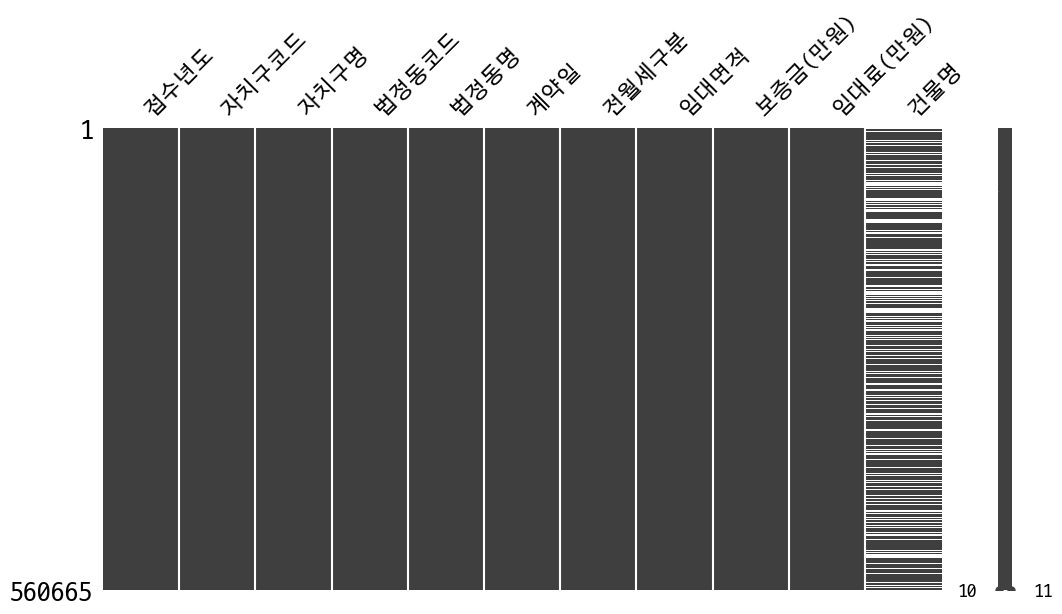

In [6]:
msno.matrix(house , figsize=(12, 6))
plt.show()

In [7]:
value_columns = ['접수년도', '자치구코드', '자치구명', '법정동코드', '법정동명', '계약일', '전월세구분', '임대면적',
       '보증금(만원)', '임대료(만원)', '건물명']
house_col = house[value_columns]
house_col

접수년도  자치구코드  자치구명  법정동코드   법정동명       계약일 전월세구분   임대면적  보증금(만원)  \
0       2022  11560  영등포구  12600  양평동2가  20220101    전세  18.84    16000   
1       2022  11560  영등포구  11800    도림동  20220101    월세  20.00      300   
2       2022  11215   광진구  10700    화양동  20220101    월세  27.82    10000   
3       2022  11620   관악구  10100    봉천동  20220101    월세  18.50     4000   
4       2022  11620   관악구  10100    봉천동  20220101    전세  14.00    13000   
...      ...    ...   ...    ...    ...       ...   ...    ...      ...   
560660  2022  11230  동대문구  10200    용두동  20221231    월세  43.00    17000   
560661  2023  11560  영등포구  13200    신길동  20221231    월세  37.00     1000   
560662  2023  11530   구로구  10700    개봉동  20221231    전세  37.00     8500   
560663  2023  11290   성북구  13300    정릉동  20221231    월세  63.57     5000   
560664  2023  11650   서초구  10300    우면동  20221231    월세  89.00    20000   

        임대료(만원)   건물명  
0             0  힘멜하임  
1            30   NaN  
2           135   NaN  
3            40   NaN  
4             0   NaN  
...         ...   ...  
560660       25   NaN  
560661       33   NaN  
560662        0   NaN  
560663       60   NaN  
560664       70   NaN  

[560665 rows x 11 columns]

In [8]:
del house

In [9]:
house_col.isnull().sum()

접수년도            0
자치구코드           0
자치구명            0
법정동코드           0
법정동명            0
계약일             0
전월세구분           0
임대면적            0
보증금(만원)         0
임대료(만원)         0
건물명        157760
dtype: int64

In [10]:
from geopy.geocoders import Nominatim

# Geopy의 Nominatim 객체를 생성합니다.
geolocator = Nominatim(user_agent="geoapiExercises")

# 주소를 이용하여 위도와 경도를 얻는 함수를 만듭니다.
def get_latitude_longitude(df):
    latitudes = []
    longitudes = []
    
    for address in df['법정동명']:
        location = geolocator.geocode(address)
        
        if location:
            latitudes.append(location.latitude)
            longitudes.append(location.longitude)
        else:
            latitudes.append(None)
            longitudes.append(None)
    
    df['위도'] = latitudes
    df['경도'] = longitudes
    
    return df

# 'house_col' 데이터프레임을 함수에 전달하여 주소를 이용한 위도와 경도를 얻습니다.
house_col_with_coordinates = get_latitude_longitude(house_col)

# 결과를 확인합니다.
print(house_col_with_coordinates.head())


GeocoderInsufficientPrivileges: Non-successful status code 403

In [11]:
# house_col 데이터프레임을 가정합니다. 필요에 따라 데이터를 로드하십시오.
# house_col = pd.read_csv('your_data.csv')

# '자치구명'과 '법정동명'을 기준으로 '보증금(만원)'의 평균을 구합니다.
average_deposit = house_col.groupby(['자치구명', '법정동명'])['보증금(만원)'].mean().reset_index()

# 결과를 확인합니다.
print(average_deposit)

    자치구명 법정동명       보증금(만원)
0    강남구  개포동  45288.589778
1    강남구  논현동  21317.245226
2    강남구  대치동  55674.782917
3    강남구  도곡동  74925.482772
4    강남구  삼성동  43803.244600
..   ...  ...           ...
396  중랑구  면목동  15211.236316
397  중랑구   묵동  15626.472921
398  중랑구  상봉동  16803.579504
399  중랑구  신내동  16935.093166
400  중랑구  중화동  13082.786927

[401 rows x 3 columns]


In [13]:
# house_col 데이터프레임을 가정합니다. 필요에 따라 데이터를 로드하십시오.
# house_col = pd.read_csv('your_data.csv')

# '법정동명'에서 중복값을 제거합니다.
unique_dong_names = house_col['법정동명'].drop_duplicates()

# 유일한 '법정동명'을 출력합니다.
print(unique_dong_names)
print(len(unique_dong_names))

0         양평동2가
1           도림동
2           화양동
3           봉천동
6           신당동
          ...  
294924      돈의동
336273      사간동
403276       재동
451726      주교동
499840     종로5가
Name: 법정동명, Length: 399, dtype: object
399


In [14]:
# house_col 데이터프레임을 가정합니다. 필요에 따라 데이터를 로드하십시오.
# house_col = pd.read_csv('your_data.csv')

# '법정동명' 열에서 중복값을 제거합니다.
unique_dong_names = house_col['법정동명'].drop_duplicates()

# Geopy의 Nominatim 객체를 생성합니다.
geolocator = Nominatim(user_agent="geoapiExercises")

# 각 '법정동명'에 대한 주소를 생성하고 지오코딩을 수행합니다.
locations = []
for dong_name in unique_dong_names:
    address = f"{dong_name}, 대한민국"
    location = geolocator.geocode(address)
    if location:
        locations.append(location)

# 결과를 확인합니다.
for location in locations:
    print(f"주소: {location.address}")
    print(f"위도: {location.latitude}")
    print(f"경도: {location.longitude}")
    print()

GeocoderInsufficientPrivileges: Non-successful status code 403

In [ ]:
# 주소를 인수로 넘겨받아 위도, 경도를 리턴하는 함수
def geocoding(address):
    geolocoder = Nominatim(user_agent='South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    return {'위도': geo.latitude, '경도': geo.longitude}
    
address = geocoding('경기도 고양시 장항동')
print(address)

# 데이터프레임에서 서울 데이터만 추출한다.

In [ ]:
# 서울만 시각화해보면 서울 지도하고 비슷하게 나온다. 
(
    ggplot(house_col, aes(x='경도', y='위도'))
        + geom_point(size=0.2, alpha=0.2)
        + theme(text=element_text(family='D2Coding') , figure_size=(10,7))
)

# 데이터프레임의 도로명주소 열을 활용해서 '시도', '구군', '도로명' 열을 만든다.

In [ ]:
# split() 메소드에 expend=True 옵션을 지정해서 공백을 경계로 문자열을 서로 다른 열(데이터프레임)로 구분해서 '시도''구군''도로명 열을 만든다.
print(type(house_col[:1].도로명주소.str)) #Series에는 split속성이 없다. - 스트링으로 형변환
print(type(house_col[:1].도로명주소.str.split(' '))) # 다시 시리즈로 변환
print('-' * 80)
print(type(house_col[:1].도로명주소.str.split(' ' , expand=True))) # 데이터프레임으로 속성 변환
print(house_col[:1].도로명주소.str.split(' ' , expand=True)[0]) # 데이터프레임의 열 이름을 추가
print(house_col[:1].도로명주소.str.split(' ' , expand=True)[1])
print(house_col[:1].도로명주소.str.split(' ' , expand=True)[2])

In [ ]:
house_col['시도'] = house_col.도로명주소.str.split(' ' , expand=True)[0]
house_col['구군'] = house_col.도로명주소.str.split(' ' , expand=True)[1]
house_col['도로명'] = house_col.도로명주소.str.split(' ' , expand=True)[2]
house_col

In [ ]:
(
    ggplot(house_col, aes(x='경도', y='위도', color='구군'))
        + geom_point(size=0.2, alpha=0.2)
        + theme(text=element_text(family='D2Coding') , figure_size=(10,7))
)

In [ ]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=house_col, x = '경도', y = '위도', hue='구군')
plt.show()

In [ ]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=house_col, x = '경도', y = '위도', hue='상권업종대분류명')
plt.show()

In [ ]:
house_col = house_col[house_col.상권업종대분류명 == '교육']
house_col

In [ ]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=house_col, x = '경도', y = '위도', hue='상권업종중분류명', s=15)
plt.show()

# 입시 학원

In [ ]:
house_col_edu = house_col[house_col.상권업종소분류명 == '입시·교과학원']
house_col_edu

In [ ]:
plt.figure(figsize=(16,12))
sns.scatterplot(data=house_col_edu, x = '경도', y = '위도', hue='구군', s=15)
plt.show()